# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [245]:
import pandas as pd
yelpURL= "../data/yelp.csv"
yelpData=pd.read_csv(yelpURL,index_col="review_id")
yelpData.head(5)
# access yelp.csv using a relative path

,business_id,date,stars,text,type,user_id,cool,useful,funny
review_id,,,,,,,,,
fWKvX83p0-ka4JS3dc6E5A,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
IjZ33sJrzXqU-0X6U8NwyA,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
IESLBzqUCLdSzSqm0eCSxQ,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
G-WvGaISbqqaMHlNnByodA,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
1uJFq2r5QfJG_6ExMRCaGw,6ozycU1RpktNG2-1BroVtw,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [246]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

import json

JSONdata = []
with open('../data/yelp.JSON') as f:
   for line in f: 
      JSONdata.append(json.loads(line))


In [247]:
# show the first review

JSONdata[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [248]:
# convert the list of dictionaries to a DataFrame

yelpFrame = pd.DataFrame(JSONdata)

yelpFrame.head(2)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [249]:
# add DataFrame columns for cool, useful, and funny

coolList =[]
usefulList =[]
funnyList=[]
for ind,row in yelpFrame.iterrows():
    funnyList.append(row["votes"]["funny"])
    usefulList.append(row["votes"]["useful"])
    coolList.append(row["votes"]["cool"])

yelpFrame["funnyRating"]=funnyList
yelpFrame["UsefulRating"]=usefulList
yelpFrame["CoolRating"]=coolList

print yelpFrame.head(5)

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id                                    votes  \
0  rLtl8ZkDX5vH5nAx9C3q5Q  {u'funny': 0, u'useful': 5, u'cool': 2}   
1  0a2KyEL0d3Yb1V6aivbIuQ  {u'funny': 0, u

In [250]:
# drop the votes column

yelpFrame.drop("votes", axis=1, inplace=True)

print yelpFrame.head(5)

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  funnyRating  UsefulRating  CoolRating  
0  rLtl8ZkDX5vH5nAx9C3q5Q            0             5           2  
1  0a2KyEL0d3Yb1V6aivbIuQ            0          

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [251]:
# treat stars as a categorical variable and look for differences between groups

#yelpFrame.stars.value_counts()
#yelpFrame.funnyRating.value_counts()
#yelpFrame.UsefulRating.value_counts()


yelpFrame.groupby("stars").count()
yelpFrame.groupby("stars").mean()




,funnyRating,UsefulRating,CoolRating
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


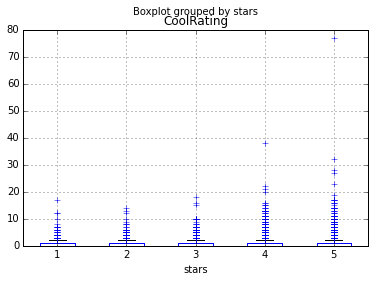

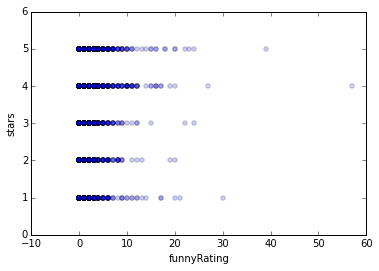

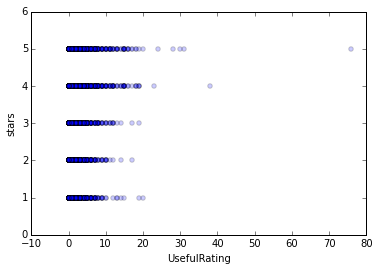

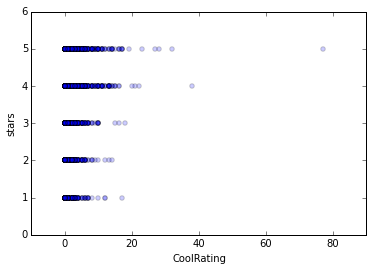

In [252]:
# correlation matrix
import matplotlib.pyplot as plt

%matplotlib inline

#yelpFrame.boxplot(column='funnyRating', by='stars')
#yelpFrame.boxplot(column='UsefulRating', by='stars')
yelpFrame.boxplot(column='CoolRating', by='stars')

yelpFrame.corr()

yelpFrame.plot(kind='scatter', x='funnyRating', y='stars', alpha=0.2)
yelpFrame.plot(kind='scatter', x='UsefulRating', y='stars', alpha=0.2)
yelpFrame.plot(kind='scatter', x='CoolRating', y='stars', alpha=0.2)




## Task 3

Define cool/useful/funny as the features, and stars as the response.

In [253]:
feature_cols = ['funnyRating',"UsefulRating", "CoolRating"]
X=yelpFrame[feature_cols]
print X.head(5)
y=yelpFrame.stars


print y.head(5)

   funnyRating  UsefulRating  CoolRating
0            0             5           2
1            0             0           0
2            0             1           0
3            0             2           1
4            0             0           0
0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64


## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [254]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

#Interesting Results. The Y-Intercept tells me that with 0 votes, we start at an average of 3.84 stars.
#the -0.135 coefficient tells me for a 1 vote increase in the funny rating, I expect a 0.13 decrease in the stars.
# for Useful, for 1 vote increase in the useful vote, I expect a 0.14 decrease in stars.
# For "Cool", votes ADD an expected 0.274 stars to the overall vote.
# So, there is a trend of many 1 or 2 star reviews that are  "funny" or "useful". So an angry customer leaves 1 stars, 
# and people vote that as "useful" or "funny"-angry.
# If it's a cool review, then it's more likely to be a higher 4 to 5 star review.

3.83989479278
[-0.13567449 -0.14745239  0.27435947]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [255]:
# calculate RMSE with all three features

from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print np.sqrt(metrics.mean_squared_error(y_test, y_pred))



1.18429052822


In [257]:
# define a function that accepts a list of features and returns testing RMSE
def rmseYELP(selected_Cols):
    X = yelpFrame[selected_Cols]
    y = yelpFrame.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg2 = LinearRegression()
    linreg2.fit(X_train, y_train)
    y_pred = linreg2.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))



In [256]:
feature_cols = ['funnyRating',"UsefulRating", "CoolRating"]
rmseYELP(feature_cols)


1.1842905282165914

## Task 6

Try removing some of the features and see if the RMSE improves.

In [259]:
#feature_cols = ['funnyRating',"UsefulRating", "CoolRating"]
#feature_cols = ['funnyRating',"CoolRating"] #1.1942673256493725
#feature_cols = ['funnyRating',"UsefulRating"] #1.2098272023900722
#feature_cols = ['CoolRating',"UsefulRating"] #1.1962390876092985
#feature_cols = ['CoolRating'] #1.2105519534116305
#feature_cols = ['UsefulRating'] #1.21191891478452
feature_cols = ['funnyRating'] #1.2102311629333229

#I could not reduce the RMSE with any combination of less feature variables. This tells me that the 3 variables 
#each add unique predictive power to the dataset.

rmseYELP(feature_cols)

1.2102311629333229

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [350]:
# new feature: review length (number of characters)
yelpFrame.head(5)

#print yelpFrame.text[0]

lengthList =[]
for ind,row in yelpFrame.iterrows():
    lengthList.append(len(row.text))

yelpFrame["lengthReview"]=lengthList



In [351]:
# new features: whether or not the review contains 'love' or 'hate'

loveList=yelpFrame.text.str.contains("love")
hateList=yelpFrame.text.str.contains("hate")

yelpFrame["loveBoolean"]=loveList
yelpFrame["hateBoolean"]=hateList

#print yelpFrame.loveBoolean.value_counts()
#print yelpFrame.hateBoolean.value_counts()

#print yelpFrame[yelpFrame.hateBoolean==True].text

#print yelpFrame.text[9921]

In [353]:
# add new features to the model and calculate RMSE

feature_cols = ['funnyRating',"UsefulRating", "CoolRating", "lengthReview", "loveBoolean","hateBoolean"]

rmseYELP(feature_cols)

#New RMSE is 1.165905, a reduction from before.

1.1659058956221358

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [354]:
# split the data (outside of the function)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [357]:
# create a NumPy array with the same shape as y_test

# ## Comparing testing RMSE with null RMSE
# Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)




In [358]:
# fill the array with the mean of y_test
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())


In [359]:
# calculate null RMSE

print  np.sqrt(metrics.mean_squared_error(y_test, y_null))


1.21232761249


## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [374]:
# import and instantiate KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [401]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

knn.fit(X_train, y_train)
yKNNPrediction=knn.predict(X_test)

print metrics.accuracy_score(y_test,yKNNPrediction)


0.3608


## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [395]:
# use linear regression to make continuous predictions

linreg = LinearRegression()
linreg.fit(X_train, y_train)
starPredicted=linreg.predict(X_test)

In [402]:
# round its predictions to the nearest integer
y_predicted_round=starPredicted.round()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [400]:
# calculate classification accuracy of the rounded predictions
print metrics.accuracy_score(y_test, y_predicted_round)

#Compared to the KNN, I scored a .3464 accuracy rate compared to 0.3608 rate.


0.3464
